# Alfredo Bernal Luna

# Simple simulation of a random walk process to see how it behaves

We can express mathematically a random walk with the following equation:

$$\begin{align}
        y_{t} = y_{t-1} + \epsilon_{t} 
\end{align}$$

In [23]:
import numpy as np
import matplotlib.pyplot as plt     # To plot
from statsmodels.tsa.stattools import adfuller # ADF to test for a random walk Time Series
from statsmodels.graphics.tsaplots import plot_acf # To plot ADF

### Initialize generation of random numbers

In [24]:
np.random.seed(42) # No matter how many times we run the code, the same random numbers will be generated

steps = np.random.standard_normal(1000)  # 1000 samples taken from a normal distribution
steps[0]=0   # For simplicity initial element of the sequence = 0

random_walk = np.cumsum(steps)

## Plot data of random walk process

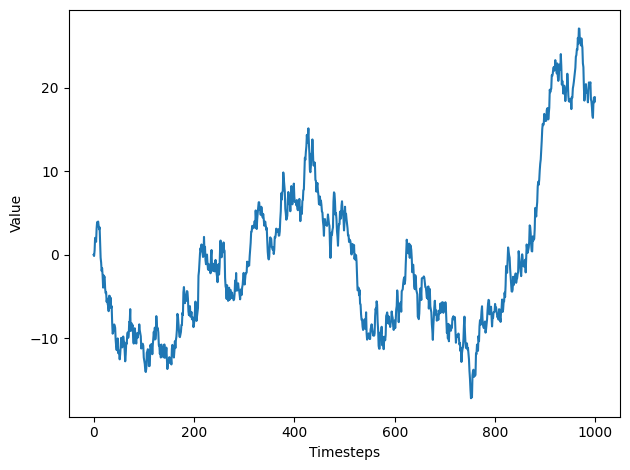

In [25]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('simple_Random_Walk.png', dpi=300)

## Look sudden changes and long periods of trends

# ADF Test to confirm that above TS is effectively a random walk process

In [26]:
ADF_result = adfuller(random_walk)

In [27]:
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.9659524876918755
p-value: 0.7654789696692579


### Since the ADF value is not a big negative number, and the returned p-value is also greater than 0.05, we cannot reject the null hypothesis. Hence, the time series likely has a unit root (and in consequence is a random walk, as we already know)

# ADF PLOT

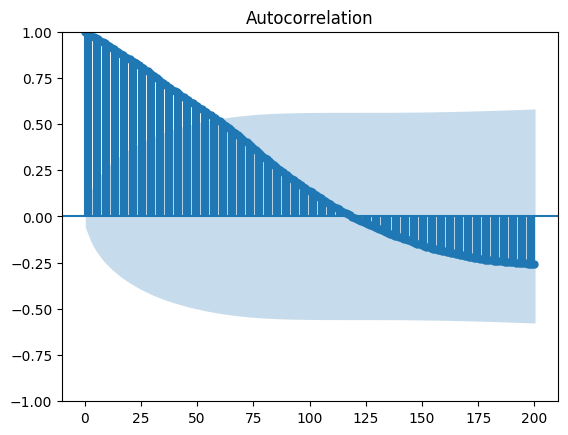

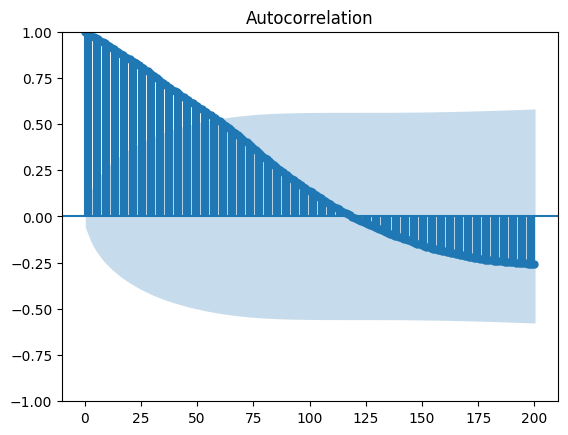

In [28]:
plot_acf(random_walk, lags=200)

### Because our random walk is not stationary, we need to apply a transformation to make it stationary in order to retrieve useful information from the ACF plot.

### Since our sequence mostly displays changes in the trend without seasonal patterns, we will apply a first-order differencing.

# Let's apply first order difference to make it stationary

In [29]:
diff_random_walk = np.diff(random_walk, n=1) # The n parameter controls how many times the array must be differenced. In this case, n=1

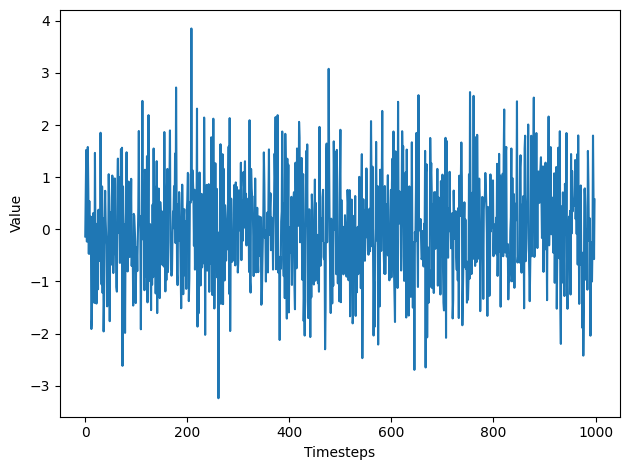

In [30]:
fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('diff_Random_Walk.png', dpi=300)

In [31]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


### Now we reject the null hypothesis, and we can say that this process has no unit root and is thus stationary

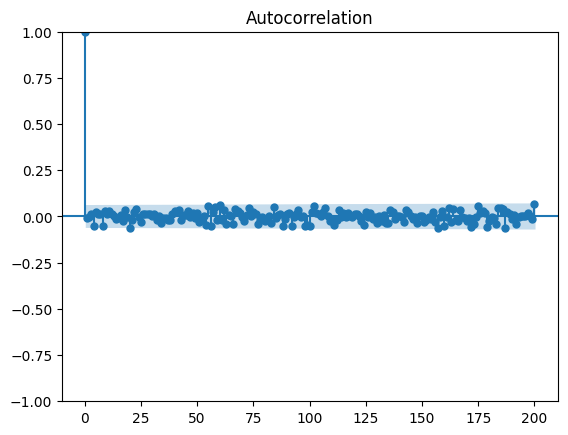

In [32]:
plot_acf(diff_random_walk, lags=200);

## There are no significant autocorrelation coefficients after lag 0. It means that the stationary process is completely random and can therefore be described as white noise:
Each value is simply a random step away from the previous one, with no relation between them

# We have demonstrated that our simulated data is indeed a random walk: the series is stationary and uncorrelated after a first-order differencing, which corresponds to the definition of a random walk.

If differencing a time series once makes it stationary, it implies that the original series is an **integrated** process of order one, denoted as \( I(1) \). A common characteristic of \( I(1) \) processes is that they include random walks, but they can also include other types of non-stationary processes. Here’s a more detailed explanation and how this connects to established theorems:

### Integrated Processes and Random Walks

1. **Integrated Process \(I(1)\)**:
   - A time series \( y_t \) is said to be integrated of order one, \( I(1) \), if its first difference, \( \Delta y_t = y_t - y_{t-1} \), is stationary.
   - If \( y_t \) is \( I(1) \), then it can be written as:
     \[ y_t = y_{t-1} + \epsilon_t \]
     where \( \epsilon_t \) is a stationary process (often white noise).

2. **Random Walk**:
   - A random walk is a specific type of \( I(1) \) process where \( \epsilon_t \) is white noise:
     \[ y_t = y_{t-1} + \epsilon_t \]

### The Connection

The Dickey-Fuller and Augmented Dickey-Fuller (ADF) tests are based on the idea of unit roots and integrated processes. If differencing a series once results in stationarity, this strongly indicates that the original series has a unit root and is \( I(1) \).

### Theorem and Statistical Basis

The theory that relates these concepts is deeply rooted in time series econometrics. While there isn’t a single "theorem" that says "if a differenced series is stationary, the original series is a random walk," there is a well-established understanding:

1. **Unit Root Processes**:
   - If the original series has a unit root, it means that it is \( I(1) \). When differenced, the unit root is removed, leaving a stationary process.

2. **Probability and Model Selection**:
   - The ADF test specifically tests the null hypothesis that the series has a unit root against the alternative hypothesis that it is stationary. Failure to reject the null for the original series, combined with stationarity of the differenced series, supports the \( I(1) \) hypothesis.
   - It is highly probable, given a stationary first difference, that the original series is a random walk or a similar process.

### Practical Confirmation

In practice, if the first differenced series is stationary (i.e., passes the ADF test), the following can be concluded:

- The original series is non-stationary and contains a unit root (making it \( I(1) \)).
- The original series behaves as a random walk or a similar unit root process.

### Summary

If the differenced series is stationary, the original series is likely \( I(1) \), often interpreted as a random walk, especially if no deterministic trend is evident. While this is a robust empirical finding supported by many studies and texts, searching for "integrated processes and unit roots in time series" in econometrics literature will yield more detailed theoretical backing.